# BigMart - Baseline Model and Validation Strategy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('final_train.csv')
df.shape

(8473, 38)

In [3]:
df.head(2)

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Weight_y,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0.016047,249.8092,1999,2,1,3735.1380,9.30,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,0.019278,48.2692,2009,2,3,443.4228,5.92,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.isnull().sum().sum()

0

Before building any model on the dataset, we will scale the independent variables.

### Scaling

In [5]:
X = df.drop(columns= 'Item_Outlet_Sales', axis= 1)
y = df['Item_Outlet_Sales']

In [6]:
ss= StandardScaler()
X_scaled = ss.fit_transform(X)

In [7]:
x = pd.DataFrame(X_scaled, columns= X.columns)

In [8]:
x

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight_y,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.737887,-0.970891,1.763875,0.133879,0.285343,-1.365170,-0.768435,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,2.847938,-0.382818,0.723256,-0.350707,-0.344522
1,1.355222,-0.908348,-1.486518,1.331598,0.285343,1.095912,-1.496059,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,-0.351131,-0.382818,-1.382637,2.851384,-0.344522
2,-0.737887,-0.957093,0.018991,0.133879,0.285343,-1.365170,0.996806,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,2.847938,-0.382818,0.723256,-0.350707,-0.344522
3,1.355222,-1.281526,0.671795,0.014107,0.285343,1.095912,1.362771,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,-0.351131,2.612209,-1.382637,-0.350707,-0.344522
4,-0.737887,-1.281526,-1.396328,-1.303383,1.948141,1.095912,-0.848086,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,-0.351131,-0.382818,0.723256,-0.350707,-0.344522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,-0.737887,-0.182343,1.194768,-1.303383,1.948141,1.095912,-1.292626,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,-0.351131,-0.382818,0.723256,-0.350707,-0.344522
8469,1.355222,-0.372064,-0.520660,0.493195,0.285343,-0.134629,-0.966487,3.474999,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,2.856571,-0.350495,-0.351131,-0.382818,0.723256,-0.350707,-0.344522
8470,-0.737887,-0.600408,-0.892157,0.732739,-1.377456,-0.134629,-0.488580,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,2.849660,-0.350070,-0.350495,-0.351131,-0.382818,0.723256,-0.350707,-0.344522
8471,1.355222,1.529581,-0.601683,1.331598,0.285343,1.095912,-1.218357,-0.287770,-0.174363,-0.114158,...,-0.257792,-0.344522,-0.350919,-0.350070,-0.350495,-0.351131,-0.382818,-1.382637,2.851384,-0.344522


In [9]:
scaled_df = pd.concat([x,y], axis=1)

### RMSE on Average Sales

In [10]:
mean_sales = []

for i in range(df.shape[0]):
    sales = df['Item_Outlet_Sales'].mean()
    mean_sales.append(sales)

In [11]:
mean_rmse = np.sqrt(mse(df['Item_Outlet_Sales'], mean_sales))
mean_rmse

1623.2436560597782

Now when we have a rough idea about RMSE from the average sales amount. We will predict the sales using different algorithms and check which algorithm is returning least RMSE. 

Let us first define the function to calculate RMSE using KFold Cross validation.

In [27]:
def baseline_score(model, data, k= 2):
    
    X = data.drop(columns = 'Item_Outlet_Sales', axis= 1)
    Y = data['Item_Outlet_Sales']
    
    KF = KFold(n_splits= k, shuffle= True, random_state= 0)
    train_score = []
    val_score = []
    
    
    for i, (train_index, val_index) in enumerate(KF.split(X, Y)):
        print('{} of KFold {}'.format((i+1), KF.n_splits))
        xtr, xval = X.iloc[train_index], X.iloc[val_index]
        ytr, yval = Y.iloc[train_index], Y.iloc[val_index]
        
        
        model.fit(xtr, ytr)

        train_preds = model.predict(xtr)
        val_preds = model.predict(xval)

        train_rmse = np.sqrt(mse(ytr, train_preds))
        val_rmse = np.sqrt(mse(yval, val_preds))

        print('RMSE on Train: {}'.format(train_rmse))
        print('RMSE on Valid: {}'.format(val_rmse))
        print('====================================================================')
        
        train_score.append(train_rmse)
        val_score.append(val_rmse)

    print('Mean RMSE on Training: {}'.format(np.mean(train_score)))
    print('Mean RMSE on Validation: {}'.format(np.mean(val_score)))
    mean_val_rmse = np.mean(val_score)
    
    return mean_val_rmse

### Test for Linear Regression

We will check if the data is suitable for linear regression or not. By checking the Vriance and Normality of the Residuals from the Predicted and Actual Sales values

In [13]:
X = scaled_df.drop(columns = 'Item_Outlet_Sales', axis= 1)
Y = scaled_df['Item_Outlet_Sales']

xtr, xval, ytr, yval = train_test_split(X,Y, random_state= 0, test_size= 1/3)
xtr.shape, xval.shape, ytr.shape, yval.shape

((5648, 37), (2825, 37), (5648,), (2825,))

In [14]:
LR = LinearRegression()
LR.fit(xtr,ytr)
preds = LR.predict(xval)

xval['Residual'] = preds - yval

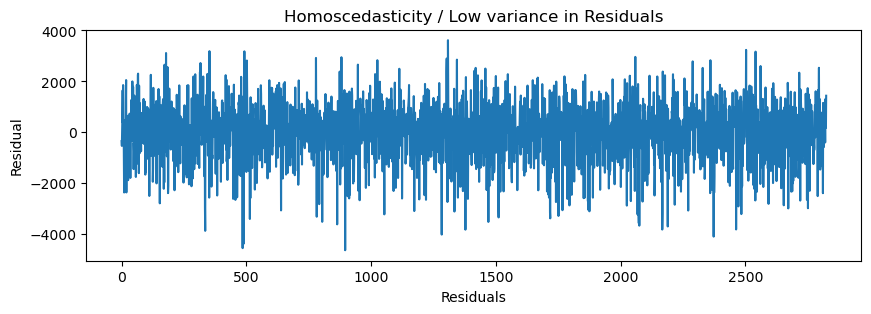

In [15]:
plt.figure(figsize= (10,3), dpi= 100)
sns.lineplot(x= (i for i in range(len(xval))), y= xval['Residual'])
plt.xlabel('Residuals')
plt.title('Homoscedasticity / Low variance in Residuals')
plt.show()

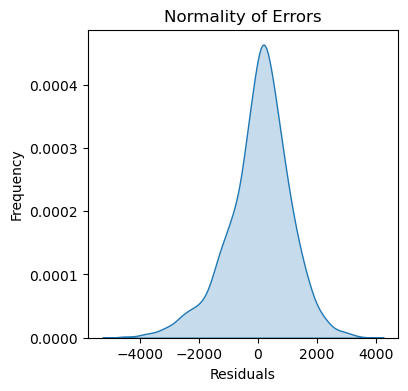

In [16]:
plt.figure(figsize= (4,4), dpi= 100)
sns.kdeplot(xval['Residual'], fill= True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Errors')
plt.show()

We can see Linear Regression Model is apt for using on this dataset because:
* The first plot shows that Errors (residuals) do not follow any underlined trend and are uniformly distributed either in positive or negative direction.
* The second plot shows the errors follow an almost Normal Distribution. 

So, let's go ahead and see KFold cross validation RMSE on Linear Regression. 


### RMSE on Linear Regression

In [17]:
LR = LinearRegression()

In [18]:
LR_valid = baseline_score(LR, scaled_df, k=5)

1 of KFold 5
RMSE on Train: 1080.4710322357055
RMSE on Valid: 1052.4251438002075
2 of KFold 5
RMSE on Train: 1074.3904881431336
RMSE on Valid: 1073.3301897977872
3 of KFold 5
RMSE on Train: 1071.3205754235419
RMSE on Valid: 1088.1794877938582
4 of KFold 5
RMSE on Train: 1071.401944691728
RMSE on Valid: 1086.4735456147216
5 of KFold 5
RMSE on Train: 1071.5592569705025
RMSE on Valid: 1086.0045680357437
Mean RMSE on Training: 1073.8286594929223
Mean RMSE on Validation: 1077.2825870084637


### RMSE on Decision Tree

In [21]:
DT = DecisionTreeRegressor(max_depth= 5, random_state= 42)

In [22]:
DT_valid = baseline_score(DT, scaled_df, k=5)

1 of KFold 5
RMSE on Train: 1029.3375781943962
RMSE on Valid: 1023.2192585690666
2 of KFold 5
RMSE on Train: 1028.9460589457892
RMSE on Valid: 1031.4635334095485
3 of KFold 5
RMSE on Train: 1020.9836049899174
RMSE on Valid: 1056.2518251218282
4 of KFold 5
RMSE on Train: 1021.1566928406573
RMSE on Valid: 1056.4679416662998
5 of KFold 5
RMSE on Train: 1023.7305191269774
RMSE on Valid: 1051.9127883848396
Mean RMSE on Training: 1024.8308908195474
Mean RMSE on Validation: 1043.8630694303167


### RMSE on Random Forest

In [23]:
RF = RandomForestRegressor(random_state= 0)

In [24]:
RF_valid = baseline_score(RF, scaled_df, k= 5)

1 of KFold 5
RMSE on Train: 404.57920756526386
RMSE on Valid: 1068.7992026662573
2 of KFold 5
RMSE on Train: 405.08596833244536
RMSE on Valid: 1055.1714749585144
3 of KFold 5
RMSE on Train: 399.9268065211262
RMSE on Valid: 1109.4490799563757
4 of KFold 5
RMSE on Train: 405.15850553475843
RMSE on Valid: 1075.4227940321693
5 of KFold 5
RMSE on Train: 402.34185777593524
RMSE on Valid: 1083.4392265374138
Mean RMSE on Training: 403.4184691459058
Mean RMSE on Validation: 1078.4563556301462


### RMSE on XGBoost

In [25]:
XGB = XGBRegressor(random_state= 0)

In [28]:
XGB_valid = baseline_score(XGB, scaled_df, k=5)

1 of KFold 5
RMSE on Train: 617.443869478914
RMSE on Valid: 1091.9556526108597
2 of KFold 5
RMSE on Train: 646.3748829303713
RMSE on Valid: 1101.6638519833475
3 of KFold 5
RMSE on Train: 612.4603778357975
RMSE on Valid: 1155.179258090784
4 of KFold 5
RMSE on Train: 624.3849264640392
RMSE on Valid: 1123.2405420005327
5 of KFold 5
RMSE on Train: 646.5034610278336
RMSE on Valid: 1122.5599334449905
Mean RMSE on Training: 629.4335035473912
Mean RMSE on Validation: 1118.919847626103


In [35]:
a = ({'Average': mean_rmse,
      'LR': LR_valid,
      'DT': DT_valid,
      'RF': RF_valid,
      'XGB': XGB_valid})
a= pd.DataFrame([a])
a

,Average,LR,DT,RF,XGB
0,1623.243656,1077.282587,1043.863069,1078.456356,1118.919848


<Figure size 100x100 with 0 Axes>

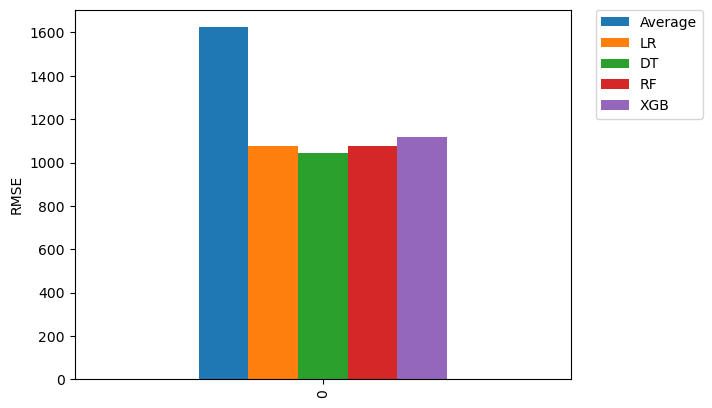

In [53]:
plt.figure(figsize=(1,1), dpi= 100)
a.plot(kind= 'bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('RMSE')
plt.show()